In [1]:
import generate_models as gm
import read_data as rd
import numpy as np
from scipy.interpolate import interp1d as interp
from matplotlib import pyplot as plt

## Extension of the MS

### Current status

In [2]:
xsun = 0.7381
ysun = 0.2485

In [17]:
def currentguess(Mmin=1, Mmax=15, howmany=200):
    #M_ref = [1,3,15]
    #p_ref = [1.482e17, 1.141e17, 2.769e16]
    #T_ref = [1.442e7, 2.347e7, 3.275e7]
    #R_ref = [6.932e10, 1.276e11, 3.289e11]
    #L_ref = [0.9083, 89.35, 1.960e4]
    #newM_ref = [0.08,0.306,0.533,0.759,0.986,1.212,1.439,1.665,1.892,2.118,2.345,2.571,2.798,3.024,3.251,3.477,3.703,3.93,4.156,4.383,4.609,4.836,5.062,5.289,5.515,5.742,5.968,6.195,6.421,6.647,6.874,7.1,7.327,7.553,7.78,8.006,8.233,8.459,8.686,8.912,9.139,9.365,9.592,9.818,10.044,10.271,10.497,10.724,10.95,11.177,11.403,11.63,11.856,12.083,12.309,12.536,12.762,12.988,13.215,13.441,13.668,13.894,14.121,14.347,14.574,14.8,15.027,15.253,15.48,15.706,15.933,16.159,16.385,16.612,16.838,17.065,17.291,17.518,17.744,17.971,18.197,18.424,18.65,18.877,19.103,19.329,19.556,19.782,20.009,20.235,20.462,20.688,20.915,21.141,21.368,21.594,21.821,22.047,22.274,22.5,23.611,24.722,25.833,26.944,28.0,31.222,34.444,37.667,40.889,44.111,47.333,50.556,53.778,57.0,60.0,70.0,80.0,90.0,100.0,110.0,120.0,130.0]
    #newp_ref = [2.5913e+16,5.465e+16,8.6424e+16,1.2353e+17,1.6988e+17,2.0925e+17,2.1463e+17,2.0247e+17,1.867e+17,1.714e+17,1.5756e+17,1.4535e+17,1.3462e+17,1.252e+17,1.1691e+17,1.0958e+17,1.0307e+17,9.7261e+16,9.2064e+16,8.739e+16,8.3173e+16,7.9351e+16,7.5877e+16,7.2709e+16,6.981e+16,6.7149e+16,6.4702e+16,6.2444e+16,6.0357e+16,5.8422e+16,5.6623e+16,5.495e+16,5.3393e+16,5.1936e+16,5.0572e+16,4.9293e+16,4.8092e+16,4.6963e+16,4.5902e+16,4.49e+16,4.3954e+16,4.306e+16,4.2213e+16,4.1408e+16,4.0646e+16,3.9924e+16,3.9235e+16,3.858e+16,3.7956e+16,3.7361e+16,3.6792e+16,3.625e+16,3.5732e+16,3.5235e+16,3.4761e+16,3.4305e+16,3.3869e+16,3.3442e+16,3.3042e+16,3.2658e+16,3.2289e+16,3.1932e+16,3.1587e+16,3.1255e+16,3.0936e+16,3.0627e+16,3.0329e+16,3.0043e+16,2.9765e+16,2.9496e+16,2.9238e+16,2.8987e+16,2.8744e+16,2.8509e+16,2.8282e+16,2.8061e+16,2.7848e+16,2.764e+16,2.7439e+16,2.7244e+16,2.7055e+16,2.6872e+16,2.6692e+16,2.6518e+16,2.6348e+16,2.6185e+16,2.6024e+16,2.5869e+16,2.5717e+16,2.557e+16,2.5427e+16,2.5287e+16,2.515e+16,2.5017e+16,2.4888e+16,2.4761e+16,2.4638e+16,2.4517e+16,2.44e+16,2.4285e+16,2.3759e+16,2.3288e+16,2.2863e+16,2.248e+16,2.2148e+16,2.1288e+16,2.0628e+16,2.0091e+16,1.9654e+16,1.9289e+16,1.8982e+16,1.8721e+16,1.8496e+16,1.8301e+16,1.8143e+16,1.773e+16,1.7437e+16,1.7225e+16,1.7067e+16,1.6947e+16,1.6855e+16,1.6783e+16]
    #newT_ref = [3601400.0,7140800.0,9772800.0,12226000.0,14877000.0,17511000.0,19333000.0,20503000.0,21371000.0,22080000.0,22690000.0,23233000.0,23724000.0,24176000.0,24594000.0,24985000.0,25352000.0,25698000.0,26026000.0,26337000.0,26633000.0,26915000.0,27185000.0,27443000.0,27691000.0,27929000.0,28158000.0,28378000.0,28591000.0,28796000.0,28993000.0,29185000.0,29372000.0,29552000.0,29726000.0,29896000.0,30060000.0,30220000.0,30374000.0,30525000.0,30671000.0,30814000.0,30953000.0,31090000.0,31222000.0,31351000.0,31478000.0,31601000.0,31722000.0,31839000.0,31955000.0,32068000.0,32177000.0,32285000.0,32391000.0,32494000.0,32595000.0,32694000.0,32792000.0,32889000.0,32982000.0,33074000.0,33165000.0,33252000.0,33339000.0,33426000.0,33510000.0,33593000.0,33674000.0,33757000.0,33832000.0,33910000.0,33986000.0,34061000.0,34135000.0,34207000.0,34279000.0,34349000.0,34418000.0,34486000.0,34554000.0,34620000.0,34685000.0,34750000.0,34813000.0,34876000.0,34938000.0,34998000.0,35058000.0,35117000.0,35176000.0,35234000.0,35291000.0,35347000.0,35403000.0,35457000.0,35511000.0,35565000.0,35618000.0,35670000.0,35917000.0,36151000.0,36372000.0,36582000.0,36772000.0,37298000.0,37767000.0,38181000.0,38554000.0,38892000.0,39200000.0,39482000.0,39743000.0,39985000.0,40196000.0,40812000.0,41323000.0,41760000.0,42139000.0,42474000.0,42772000.0,43041000.0]
    #newR_ref = [15891000000.0,27430000000.0,36770000000.0,50125000000.0,73183000000.0,84394000000.0,87326000000.0,91751000000.0,96810000000.0,102090000000.0,107420000000.0,112730000000.0,117970000000.0,123140000000.0,128220000000.0,133210000000.0,138120000000.0,142940000000.0,147680000000.0,152340000000.0,156920000000.0,161430000000.0,165870000000.0,170240000000.0,174550000000.0,178790000000.0,182970000000.0,187100000000.0,191170000000.0,195180000000.0,199130000000.0,203040000000.0,206930000000.0,210740000000.0,214520000000.0,218250000000.0,221940000000.0,225580000000.0,229170000000.0,232730000000.0,236250000000.0,239740000000.0,243190000000.0,246610000000.0,249980000000.0,253330000000.0,256640000000.0,259920000000.0,263170000000.0,266390000000.0,269580000000.0,272740000000.0,275860000000.0,278960000000.0,282040000000.0,285090000000.0,288110000000.0,291070000000.0,294060000000.0,297020000000.0,299950000000.0,302850000000.0,305730000000.0,308570000000.0,311410000000.0,314220000000.0,317010000000.0,319780000000.0,322530000000.0,325270000000.0,327970000000.0,330660000000.0,333330000000.0,335980000000.0,338620000000.0,341230000000.0,343830000000.0,346410000000.0,348980000000.0,351530000000.0,354060000000.0,356590000000.0,359080000000.0,361560000000.0,364020000000.0,366490000000.0,368920000000.0,371360000000.0,373770000000.0,376170000000.0,378560000000.0,380930000000.0,383280000000.0,385640000000.0,387970000000.0,390290000000.0,392620000000.0,394900000000.0,397200000000.0,399460000000.0,410450000000.0,421190000000.0,431660000000.0,441920000000.0,451470000000.0,479270000000.0,506310000000.0,531840000000.0,556390000000.0,580050000000.0,602830000000.0,624990000000.0,646490000000.0,667450000000.0,686540000000.0,747420000000.0,803990000000.0,857790000000.0,909110000000.0,958260000000.0,1005500000000.0,1051100000000.0]
    #newL_ref = [3.113149665447022e-05,0.007930489601281983,0.07466206543779416,0.3306739627988451,1.130576619657078,2.989509927814587,6.16311114741984,11.033162127669812,18.14261982038613,28.07372232343648,41.40950127434677,58.74893525297766,80.7049178911866,107.86983141660878,140.83156323665284,180.13578646691397,226.51658212545954,280.41419854536935,342.29456231604144,412.8573303779981,492.6063433495771,581.9691989817644,681.3966592828317,791.589454624261,912.8512193311221,1045.442135694148,1190.1453387038553,1347.1005082758036,1516.7010939163386,1699.417162886752,1895.3961755993425,2105.2321804752323,2331.309857418028,2570.987706415226,2824.8799749157074,3095.2804165939788,3380.6483620598156,3681.289736425313,3995.765566188054,4329.123745028265,4678.428536839501,5043.128102663999,5426.252513290146,5829.079788672337,6247.4098790155385,6680.362046792469,7133.456216702232,7605.013686927006,8094.685874176842,8602.01112713024,9132.716996648163,9676.09224577728,10235.286413287924,10816.829893379321,11415.633046188459,12033.722711826847,12673.600118311286,13322.937789769398,14005.544572422317,14706.184154045619,15424.105957495969,16154.741014619049,16916.090502776344,17672.5817784194,18462.903509747837,19288.568602156247,20114.071982009064,20974.90487978542,21847.41206479047,22766.69555330906,23642.85942401745,24581.025650893436,25527.013026612472,26497.20098878961,27485.269519646674,28497.05627341151,29525.686217289687,30577.3609569008,31644.62838835526,32726.533057537137,33837.63488617649,34954.250959859964,36107.71451003529,37273.48496903333,38459.178204535354,39655.18679916798,40888.38902676978,42121.12867540669,43381.04405465888,44658.07512933513,45962.11446660011,47282.453051179604,48618.325846498374,49980.43135782396,51357.04178483559,52747.27156616844,54150.19189534895,55590.42572704037,57042.690309986894,58505.945195000575, 65978.12965139568,73892.43870344739,82224.26499470712,90970.37814779893,99655.20801347682,128233.05826560206,160324.53906900418,195164.13002858264,232755.5256554283,272960.6225513583,315427.82403443614,360246.69071148784,407098.96665027394,455931.9216592222,503152.922989318,671274.2685170481,852511.0168263653,1046164.5510220069,1249971.1805783696,1462850.686999852,1683449.1395670678,1911172.9942272024]
    #M_ref = M_ref + newM_ref
    #p_ref = p_ref + newp_ref
    #T_ref = T_ref + newT_ref
    #R_ref = R_ref + newR_ref
    #L_ref = L_ref + newL_ref
    
    M_ref = [0.080,0.119,0.177,0.263,0.391,0.581,0.864,1.285,1.911,2.841,4.224,6.280,9.338,13.884,20.643,30.693,45.635,67.852,100.885,150.000]
    p_ref = [2.591e+16,2.687e+16,3.227e+16,4.628e+16,7.092e+16,8.606e+16,2.029e+17,2.358e+17,1.852e+17,1.233e+17,9.059e+16,6.164e+16,4.316e+16,3.195e+16,2.531e+16,2.141e+16,1.914e+16,1.781e+16,1.706e+16,1.667e+16]
    T_ref = [3.601e+06,4.215e+06,5.139e+06,6.494e+06,8.311e+06,1.010e+07,1.492e+07,1.874e+07,2.143e+07,2.329e+07,2.612e+07,2.846e+07,3.080e+07,3.307e+07,3.522e+07,3.722e+07,3.904e+07,4.069e+07,4.217e+07,4.353e+07]
    R_ref = [1.589e+10,1.743e+10,2.022e+10,2.498e+10,3.194e+10,3.733e+10,7.279e+10,8.998e+10,9.721e+10,1.229e+11,1.491e+11,1.886e+11,2.393e+11,3.027e+11,3.805e+11,4.748e+11,5.909e+11,7.347e+11,9.135e+11,1.139e+12]
    L_ref = [3.113e-05,5.147e-05,3.144e-04,3.293e-03,2.743e-02,8.627e-02,1.417e+00,4.578e+00,1.882e+01,7.459e+01,3.624e+02,1.410e+03,4.999e+03,1.612e+04,4.702e+04,1.233e+05,2.928e+05,6.340e+05,1.268e+06,2.387e+06]
    
    # interpolating function
    p_int = interp(M_ref, p_ref, fill_value='extrapolate', kind='cubic')
    T_int = interp(M_ref, T_ref, fill_value='extrapolate',kind='cubic')
    R_int = interp(M_ref, R_ref, fill_value='extrapolate',kind='cubic')
    loglogL_int = interp(np.log(M_ref), np.log(L_ref), fill_value='extrapolate',kind='cubic')

    # interpolated values
    M = np.linspace(Mmin, Mmax, howmany)
    p = p_int(M)
    T = T_int(M)
    R = R_int(M)
    L = np.exp(loglogL_int(np.log(M)))
        
    # models
    models = [[M[i], p[i], T[i], R[i], L[i]] for i in range(M.size)]

    return models


# general scan
mmin = 0.08
mmax = 150
hm = 1000
converged_parameters, worked = gm.do_pipeline_models_zams_work(Mmin=mmin, Mmax=mmax, howmany=hm, x=xsun, y=ysun, msguess=currentguess)
models = currentguess(Mmin=mmin, Mmax=mmax, howmany=hm)
workingvalues = [models[i] for i, x in enumerate(worked) if x]

Starting model no. 0
Starting model no. 1
Starting model no. 2
Starting model no. 3
Starting model no. 4
Starting model no. 5
Starting model no. 6
Starting model no. 7
Starting model no. 8
Starting model no. 9
Starting model no. 10
Starting model no. 11
Starting model no. 12
Starting model no. 13
Starting model no. 14
Starting model no. 15
Starting model no. 16
Starting model no. 17
Starting model no. 18
Starting model no. 19
Starting model no. 20
Starting model no. 21
Starting model no. 22
Starting model no. 23
Starting model no. 24
Starting model no. 25
Starting model no. 26
Starting model no. 27
Starting model no. 28
Starting model no. 29
Starting model no. 30
Starting model no. 31
Starting model no. 32
Starting model no. 33
Starting model no. 34
Starting model no. 35
Starting model no. 36
Starting model no. 37
Starting model no. 38
Starting model no. 39
Starting model no. 40
Starting model no. 41
Starting model no. 42
Starting model no. 43
Starting model no. 44
Starting model no. 4

Starting model no. 365
Starting model no. 366
Starting model no. 367
Starting model no. 368
Starting model no. 369
Starting model no. 370
Starting model no. 371
Starting model no. 372
Starting model no. 373
Starting model no. 374
Starting model no. 375
Starting model no. 376
Starting model no. 377
Starting model no. 378
Starting model no. 379
Starting model no. 380
Starting model no. 381
Starting model no. 382
Starting model no. 383
Starting model no. 384
Starting model no. 385
Starting model no. 386
Starting model no. 387
Starting model no. 388
Starting model no. 389
Starting model no. 390
Starting model no. 391
Starting model no. 392
Starting model no. 393
Starting model no. 394
Starting model no. 395
Starting model no. 396
Starting model no. 397
Starting model no. 398
Starting model no. 399
Starting model no. 400
Starting model no. 401
Starting model no. 402
Starting model no. 403
Starting model no. 404
Starting model no. 405
Starting model no. 406
Starting model no. 407
Starting mo

Starting model no. 727
Starting model no. 728
Starting model no. 729
Starting model no. 730
Starting model no. 731
Starting model no. 732
Starting model no. 733
Starting model no. 734
Starting model no. 735
Starting model no. 736
Starting model no. 737
Starting model no. 738
Starting model no. 739
Starting model no. 740
Starting model no. 741
Starting model no. 742
Starting model no. 743
Starting model no. 744
Starting model no. 745
Starting model no. 746
Starting model no. 747
Starting model no. 748
Starting model no. 749
Starting model no. 750
Starting model no. 751
Starting model no. 752
Starting model no. 753
Starting model no. 754
Starting model no. 755
Starting model no. 756
Starting model no. 757
Starting model no. 758
Starting model no. 759
Starting model no. 760
Starting model no. 761
Starting model no. 762
Starting model no. 763
Starting model no. 764
Starting model no. 765
Starting model no. 766
Starting model no. 767
Starting model no. 768
Starting model no. 769
Starting mo

In [30]:
luminosity = [converged_parameters[i][8] for i in range(len(converged_parameters))]
efftemp = [converged_parameters[i][7] for i in range(len(converged_parameters))]

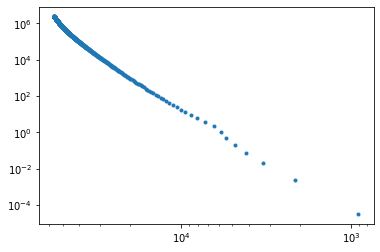

In [41]:
#HR!
fig,ax=plt.subplots()
ax.loglog(efftemp, luminosity,'.')
plt.gca().invert_xaxis()

In [26]:
M_ref = [1,3,15]
p_ref = [1.482e17, 1.141e17, 2.769e16]
T_ref = [1.442e7, 2.347e7, 3.275e7]
R_ref = [6.932e10, 1.276e11, 3.289e11]
L_ref = [0.9083, 89.35, 1.960e4]    # it seems that one is logarithmically
                                    #spaced!


newM_ref = [0.08,0.306,0.533,0.759,0.986,1.212,1.439,1.665,1.892,2.118,2.345,2.571,2.798,3.024,3.251,3.477,3.703,3.93,4.156,4.383,4.609,4.836,5.062,5.289,5.515,5.742,5.968,6.195,6.421,6.647,6.874,7.1,7.327,7.553,7.78,8.006,8.233,8.459,8.686,8.912,9.139,9.365,9.592,9.818,10.044,10.271,10.497,10.724,10.95,11.177,11.403,11.63,11.856,12.083,12.309,12.536,12.762,12.988,13.215,13.441,13.668,13.894,14.121,14.347,14.574,14.8,15.027,15.253,15.48,15.706,15.933,16.159,16.385,16.612,16.838,17.065,17.291,17.518,17.744,17.971,18.197,18.424,18.65,18.877,19.103,19.329,19.556,19.782,20.009,20.235,20.462,20.688,20.915,21.141,21.368,21.594,21.821,22.047,22.274,22.5,23.611,24.722,25.833,26.944,28.0,31.222,34.444,37.667,40.889,44.111,47.333,50.556,53.778,57.0,60.0,70.0,80.0,90.0,100.0,110.0,120.0,130.0]
newp_ref = [2.5913e+16,5.465e+16,8.6424e+16,1.2353e+17,1.6988e+17,2.0925e+17,2.1463e+17,2.0247e+17,1.867e+17,1.714e+17,1.5756e+17,1.4535e+17,1.3462e+17,1.252e+17,1.1691e+17,1.0958e+17,1.0307e+17,9.7261e+16,9.2064e+16,8.739e+16,8.3173e+16,7.9351e+16,7.5877e+16,7.2709e+16,6.981e+16,6.7149e+16,6.4702e+16,6.2444e+16,6.0357e+16,5.8422e+16,5.6623e+16,5.495e+16,5.3393e+16,5.1936e+16,5.0572e+16,4.9293e+16,4.8092e+16,4.6963e+16,4.5902e+16,4.49e+16,4.3954e+16,4.306e+16,4.2213e+16,4.1408e+16,4.0646e+16,3.9924e+16,3.9235e+16,3.858e+16,3.7956e+16,3.7361e+16,3.6792e+16,3.625e+16,3.5732e+16,3.5235e+16,3.4761e+16,3.4305e+16,3.3869e+16,3.3442e+16,3.3042e+16,3.2658e+16,3.2289e+16,3.1932e+16,3.1587e+16,3.1255e+16,3.0936e+16,3.0627e+16,3.0329e+16,3.0043e+16,2.9765e+16,2.9496e+16,2.9238e+16,2.8987e+16,2.8744e+16,2.8509e+16,2.8282e+16,2.8061e+16,2.7848e+16,2.764e+16,2.7439e+16,2.7244e+16,2.7055e+16,2.6872e+16,2.6692e+16,2.6518e+16,2.6348e+16,2.6185e+16,2.6024e+16,2.5869e+16,2.5717e+16,2.557e+16,2.5427e+16,2.5287e+16,2.515e+16,2.5017e+16,2.4888e+16,2.4761e+16,2.4638e+16,2.4517e+16,2.44e+16,2.4285e+16,2.3759e+16,2.3288e+16,2.2863e+16,2.248e+16,2.2148e+16,2.1288e+16,2.0628e+16,2.0091e+16,1.9654e+16,1.9289e+16,1.8982e+16,1.8721e+16,1.8496e+16,1.8301e+16,1.8143e+16,1.773e+16,1.7437e+16,1.7225e+16,1.7067e+16,1.6947e+16,1.6855e+16,1.6783e+16]
newT_ref = [3601400.0,7140800.0,9772800.0,12226000.0,14877000.0,17511000.0,19333000.0,20503000.0,21371000.0,22080000.0,22690000.0,23233000.0,23724000.0,24176000.0,24594000.0,24985000.0,25352000.0,25698000.0,26026000.0,26337000.0,26633000.0,26915000.0,27185000.0,27443000.0,27691000.0,27929000.0,28158000.0,28378000.0,28591000.0,28796000.0,28993000.0,29185000.0,29372000.0,29552000.0,29726000.0,29896000.0,30060000.0,30220000.0,30374000.0,30525000.0,30671000.0,30814000.0,30953000.0,31090000.0,31222000.0,31351000.0,31478000.0,31601000.0,31722000.0,31839000.0,31955000.0,32068000.0,32177000.0,32285000.0,32391000.0,32494000.0,32595000.0,32694000.0,32792000.0,32889000.0,32982000.0,33074000.0,33165000.0,33252000.0,33339000.0,33426000.0,33510000.0,33593000.0,33674000.0,33757000.0,33832000.0,33910000.0,33986000.0,34061000.0,34135000.0,34207000.0,34279000.0,34349000.0,34418000.0,34486000.0,34554000.0,34620000.0,34685000.0,34750000.0,34813000.0,34876000.0,34938000.0,34998000.0,35058000.0,35117000.0,35176000.0,35234000.0,35291000.0,35347000.0,35403000.0,35457000.0,35511000.0,35565000.0,35618000.0,35670000.0,35917000.0,36151000.0,36372000.0,36582000.0,36772000.0,37298000.0,37767000.0,38181000.0,38554000.0,38892000.0,39200000.0,39482000.0,39743000.0,39985000.0,40196000.0,40812000.0,41323000.0,41760000.0,42139000.0,42474000.0,42772000.0,43041000.0]
newR_ref = [15891000000.0,27430000000.0,36770000000.0,50125000000.0,73183000000.0,84394000000.0,87326000000.0,91751000000.0,96810000000.0,102090000000.0,107420000000.0,112730000000.0,117970000000.0,123140000000.0,128220000000.0,133210000000.0,138120000000.0,142940000000.0,147680000000.0,152340000000.0,156920000000.0,161430000000.0,165870000000.0,170240000000.0,174550000000.0,178790000000.0,182970000000.0,187100000000.0,191170000000.0,195180000000.0,199130000000.0,203040000000.0,206930000000.0,210740000000.0,214520000000.0,218250000000.0,221940000000.0,225580000000.0,229170000000.0,232730000000.0,236250000000.0,239740000000.0,243190000000.0,246610000000.0,249980000000.0,253330000000.0,256640000000.0,259920000000.0,263170000000.0,266390000000.0,269580000000.0,272740000000.0,275860000000.0,278960000000.0,282040000000.0,285090000000.0,288110000000.0,291070000000.0,294060000000.0,297020000000.0,299950000000.0,302850000000.0,305730000000.0,308570000000.0,311410000000.0,314220000000.0,317010000000.0,319780000000.0,322530000000.0,325270000000.0,327970000000.0,330660000000.0,333330000000.0,335980000000.0,338620000000.0,341230000000.0,343830000000.0,346410000000.0,348980000000.0,351530000000.0,354060000000.0,356590000000.0,359080000000.0,361560000000.0,364020000000.0,366490000000.0,368920000000.0,371360000000.0,373770000000.0,376170000000.0,378560000000.0,380930000000.0,383280000000.0,385640000000.0,387970000000.0,390290000000.0,392620000000.0,394900000000.0,397200000000.0,399460000000.0,410450000000.0,421190000000.0,431660000000.0,441920000000.0,451470000000.0,479270000000.0,506310000000.0,531840000000.0,556390000000.0,580050000000.0,602830000000.0,624990000000.0,646490000000.0,667450000000.0,686540000000.0,747420000000.0,803990000000.0,857790000000.0,909110000000.0,958260000000.0,1005500000000.0,1051100000000.0]
newL_ref = [3.113149665447022e-05,0.007930489601281983,0.07466206543779416,0.3306739627988451,1.130576619657078,2.989509927814587,6.16311114741984,11.033162127669812,18.14261982038613,28.07372232343648,41.40950127434677,58.74893525297766,80.7049178911866,107.86983141660878,140.83156323665284,180.13578646691397,226.51658212545954,280.41419854536935,342.29456231604144,412.8573303779981,492.6063433495771,581.9691989817644,681.3966592828317,791.589454624261,912.8512193311221,1045.442135694148,1190.1453387038553,1347.1005082758036,1516.7010939163386,1699.417162886752,1895.3961755993425,2105.2321804752323,2331.309857418028,2570.987706415226,2824.8799749157074,3095.2804165939788,3380.6483620598156,3681.289736425313,3995.765566188054,4329.123745028265,4678.428536839501,5043.128102663999,5426.252513290146,5829.079788672337,6247.4098790155385,6680.362046792469,7133.456216702232,7605.013686927006,8094.685874176842,8602.01112713024,9132.716996648163,9676.09224577728,10235.286413287924,10816.829893379321,11415.633046188459,12033.722711826847,12673.600118311286,13322.937789769398,14005.544572422317,14706.184154045619,15424.105957495969,16154.741014619049,16916.090502776344,17672.5817784194,18462.903509747837,19288.568602156247,20114.071982009064,20974.90487978542,21847.41206479047,22766.69555330906,23642.85942401745,24581.025650893436,25527.013026612472,26497.20098878961,27485.269519646674,28497.05627341151,29525.686217289687,30577.3609569008,31644.62838835526,32726.533057537137,33837.63488617649,34954.250959859964,36107.71451003529,37273.48496903333,38459.178204535354,39655.18679916798,40888.38902676978,42121.12867540669,43381.04405465888,44658.07512933513,45962.11446660011,47282.453051179604,48618.325846498374,49980.43135782396,51357.04178483559,52747.27156616844,54150.19189534895,55590.42572704037,57042.690309986894,58505.945195000575, 65978.12965139568,73892.43870344739,82224.26499470712,90970.37814779893,99655.20801347682,128233.05826560206,160324.53906900418,195164.13002858264,232755.5256554283,272960.6225513583,315427.82403443614,360246.69071148784,407098.96665027394,455931.9216592222,503152.922989318,671274.2685170481,852511.0168263653,1046164.5510220069,1249971.1805783696,1462850.686999852,1683449.1395670678,1911172.9942272024]
M_ref = M_ref + newM_ref
p_ref = p_ref + newp_ref
T_ref = T_ref + newT_ref
R_ref = R_ref + newR_ref
L_ref = L_ref + newL_ref

# interpolating function
p_int = interp(M_ref, p_ref, fill_value='extrapolate', kind='cubic')
T_int = interp(M_ref, T_ref, fill_value='extrapolate',kind='cubic')
R_int = interp(M_ref, R_ref, fill_value='extrapolate',kind='cubic')
loglogL_int = interp(np.log(M_ref), np.log(L_ref), fill_value='extrapolate',kind='cubic')

# interpolated values
M = np.logspace(np.log10(0.08), np.log10(150), 20)
p = p_int(M)
T = T_int(M)
R = R_int(M)
L = np.exp(loglogL_int(np.log(M)))

In [42]:
M_ref = M
p_ref = p
T_ref = T
R_ref = R
L_ref = L

In [45]:
M_ref

array([8.00000000e-02, 1.18946923e-01, 1.76854631e-01, 2.62953927e-01,
       3.90969507e-01, 5.81307748e-01, 8.64309599e-01, 1.28508709e+00,
       1.91071444e+00, 2.84092004e+00, 4.22398372e+00, 6.28037332e+00,
       9.33788853e+00, 1.38839138e+01, 2.06431104e+01, 3.06929308e+01,
       4.56353709e+01, 6.78523368e+01, 1.00885334e+02, 1.50000000e+02])

In [55]:
string=''
for i in L:
    string = string+'{0:.3e},'.format(i)
string

'3.113e-05,5.147e-05,3.144e-04,3.293e-03,2.743e-02,8.627e-02,1.417e+00,4.578e+00,1.882e+01,7.459e+01,3.624e+02,1.410e+03,4.999e+03,1.612e+04,4.702e+04,1.233e+05,2.928e+05,6.340e+05,1.268e+06,2.387e+06,'

In [65]:
def currentguess(Mmin=1, Mmax=15, howmany=200):
    M_ref = [0.080,0.119,0.177,0.263,0.391,0.581,0.864,1.285,1.911,2.841,4.224,6.280,9.338,13.884,20.643,30.693,45.635,67.852,100.885,150.000]
    p_ref = [2.591e+16,2.687e+16,3.227e+16,4.628e+16,7.092e+16,8.606e+16,2.029e+17,2.358e+17,1.852e+17,1.233e+17,9.059e+16,6.164e+16,4.316e+16,3.195e+16,2.531e+16,2.141e+16,1.914e+16,1.781e+16,1.706e+16,1.667e+16]
    T_ref = [3.601e+06,4.215e+06,5.139e+06,6.494e+06,8.311e+06,1.010e+07,1.492e+07,1.874e+07,2.143e+07,2.329e+07,2.612e+07,2.846e+07,3.080e+07,3.307e+07,3.522e+07,3.722e+07,3.904e+07,4.069e+07,4.217e+07,4.353e+07]
    R_ref = [1.589e+10,1.743e+10,2.022e+10,2.498e+10,3.194e+10,3.733e+10,7.279e+10,8.998e+10,9.721e+10,1.229e+11,1.491e+11,1.886e+11,2.393e+11,3.027e+11,3.805e+11,4.748e+11,5.909e+11,7.347e+11,9.135e+11,1.139e+12]
    L_ref = [3.113e-05,5.147e-05,3.144e-04,3.293e-03,2.743e-02,8.627e-02,1.417e+00,4.578e+00,1.882e+01,7.459e+01,3.624e+02,1.410e+03,4.999e+03,1.612e+04,4.702e+04,1.233e+05,2.928e+05,6.340e+05,1.268e+06,2.387e+06]
    
    # interpolating function
    p_int = interp(M_ref, p_ref, fill_value='extrapolate', kind='cubic')
    T_int = interp(M_ref, T_ref, fill_value='extrapolate',kind='cubic')
    R_int = interp(M_ref, R_ref, fill_value='extrapolate',kind='cubic')
    loglogL_int = interp(np.log(M_ref), np.log(L_ref), fill_value='extrapolate',kind='cubic')

    # interpolated values
    M = np.linspace(Mmin, Mmax, howmany)
    p = p_int(M)
    T = T_int(M)
    R = R_int(M)
    L = np.exp(loglogL_int(np.log(M)))
        
    # models
    models = [[M[i], p[i], T[i], R[i], L[i]] for i in range(M.size)]

    return models


# general scan
mmin = 0.08
mmax = 150
hm = 1010
converged_parameters, worked = gm.do_pipeline_models_zams_work(Mmin=mmin, Mmax=mmax, howmany=hm, x=xsun, y=ysun, msguess=currentguess)
models = currentguess(Mmin=mmin, Mmax=mmax, howmany=hm)
workingvalues = [models[i] for i, x in enumerate(worked) if x]

Starting model no. 0
Starting model no. 1
Starting model no. 2
Starting model no. 3
Starting model no. 4
Starting model no. 5
Starting model no. 6
Starting model no. 7
Starting model no. 8
Starting model no. 9
Starting model no. 10
Starting model no. 11
Starting model no. 12
Starting model no. 13
Starting model no. 14
Starting model no. 15
Starting model no. 16
Starting model no. 17
Starting model no. 18
Starting model no. 19
Starting model no. 20
Starting model no. 21
Starting model no. 22
Starting model no. 23
Starting model no. 24
Starting model no. 25
Starting model no. 26
Starting model no. 27
Starting model no. 28
Starting model no. 29
Starting model no. 30
Starting model no. 31
Starting model no. 32
Starting model no. 33
Starting model no. 34
Starting model no. 35
Starting model no. 36
Starting model no. 37
Starting model no. 38
Starting model no. 39
Starting model no. 40
Starting model no. 41
Starting model no. 42
Starting model no. 43
Starting model no. 44
Starting model no. 4

Starting model no. 365
Starting model no. 366
Starting model no. 367
Starting model no. 368
Starting model no. 369
Starting model no. 370
Starting model no. 371
Starting model no. 372
Starting model no. 373
Starting model no. 374
Starting model no. 375
Starting model no. 376
Starting model no. 377
Starting model no. 378
Starting model no. 379
Starting model no. 380
Starting model no. 381
Starting model no. 382
Starting model no. 383
Starting model no. 384
Starting model no. 385
Starting model no. 386
Starting model no. 387
Starting model no. 388
Starting model no. 389
Starting model no. 390
Starting model no. 391
Starting model no. 392
Starting model no. 393
Starting model no. 394
Starting model no. 395
Starting model no. 396
Starting model no. 397
Starting model no. 398
Starting model no. 399
Starting model no. 400
Starting model no. 401
Starting model no. 402
Starting model no. 403
Starting model no. 404
Starting model no. 405
Starting model no. 406
Starting model no. 407
Starting mo

Starting model no. 727
Starting model no. 728
Starting model no. 729
Starting model no. 730
Starting model no. 731
Starting model no. 732
Starting model no. 733
Starting model no. 734
Starting model no. 735
Starting model no. 736
Starting model no. 737
Starting model no. 738
Starting model no. 739
Starting model no. 740
Starting model no. 741
Starting model no. 742
Starting model no. 743
Starting model no. 744
Starting model no. 745
Starting model no. 746
Starting model no. 747
Starting model no. 748
Starting model no. 749
Starting model no. 750
Starting model no. 751
Starting model no. 752
Starting model no. 753
Starting model no. 754
Starting model no. 755
Starting model no. 756
Starting model no. 757
Starting model no. 758
Starting model no. 759
Starting model no. 760
Starting model no. 761
Starting model no. 762
Starting model no. 763
Starting model no. 764
Starting model no. 765
Starting model no. 766
Starting model no. 767
Starting model no. 768
Starting model no. 769
Starting mo

In [14]:
string=''
for i,t in enumerate(worked):
    if t == True:
        
        string=string+'{},'.format(converged_parameters[i][8])
string

'503152.922989318,671274.2685170481,852511.0168263653,1046164.5510220069,1249971.1805783696,1462850.686999852,1683449.1395670678,1911172.9942272024,'

In [27]:
[converged_parameters[i][4] for i,t in enumerate(worked) if t == True]

[3601400.0,
 6798300.0,
 9247100.0,
 11382000.0,
 13666000.0,
 16084000.0,
 18217000.0,
 19628000.0,
 20607000.0,
 21368000.0,
 22004000.0,
 22559000.0,
 23056000.0,
 23509000.0,
 23927000.0,
 24316000.0,
 24681000.0,
 25025000.0,
 25350000.0,
 25658000.0,
 25952000.0,
 26232000.0,
 26500000.0,
 26757000.0,
 27004000.0,
 27240000.0,
 27468000.0,
 27688000.0,
 27900000.0,
 28104000.0,
 28303000.0,
 28494000.0,
 33021000.0,
 33101000.0,
 33182000.0,
 33261000.0,
 33338000.0,
 33413000.0,
 33489000.0,
 33563000.0,
 33635000.0,
 33707000.0,
 33778000.0,
 33847000.0,
 33916000.0,
 33983000.0,
 34050000.0,
 34115000.0,
 34180000.0,
 34244000.0,
 34307000.0,
 34370000.0,
 34431000.0,
 34492000.0,
 34551000.0]

In [156]:
column=3
[round(workingvalues[5*i][column],-6) for i in range(int(len(workingvalues)/5))]

[161216000000.0,
 176512000000.0,
 191829000000.0,
 207184000000.0,
 222566000000.0,
 237970000000.0,
 253392000000.0,
 268826000000.0,
 284270000000.0,
 299719000000.0]

In [123]:
workingvalues

[[5.0,
  9.969964201194813e+16,
  24971310.86146565,
  161215933483.89838,
  219.89920289499813],
 [5.183673469387755,
  9.840487121187128e+16,
  25112092.386292934,
  164290867249.37073,
  238.74438508614148],
 [5.36734693877551,
  9.710858935154702e+16,
  25257739.151477657,
  167354042386.72916,
  259.144053843198],
 [5.551020408163265,
  9.580466081481146e+16,
  25407204.797109477,
  170409385860.92325,
  281.25347953040585],
 [5.73469387755102,
  9.448694998550053e+16,
  25559442.963278025,
  173460824636.90244,
  305.24104751544877],
 [5.918367346938775,
  9.314932124745037e+16,
  25713407.290072963,
  176512285679.61636,
  331.28965884300516],
 [6.1020408163265305,
  9.1785638984497e+16,
  25868051.417583942,
  179567695954.01447,
  359.59824250302944],
 [6.285714285714286,
  9.039457165934366e+16,
  26022379.65128594,
  182629879840.81232,
  390.3746857042242],
 [6.469387755102041,
  7.120185490176533e+16,
  26175857.444563195,
  185694902328.95557,
  423.79279763687146],
 [6.6

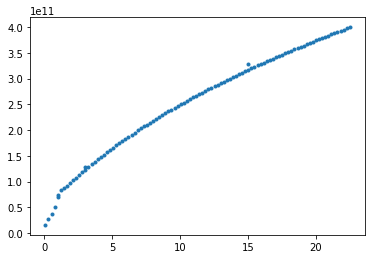

In [38]:
M_ref = [1,3,15]
p_ref = [1.482e17, 1.141e17, 2.769e16]
T_ref = [1.442e7, 2.347e7, 3.275e7]
R_ref = [6.932e10, 1.276e11, 3.289e11]
L_ref = [0.9083, 89.35, 1.960e4]    # it seems that one is logarithmically
                                    #spaced!


newM_ref = [0.08,0.306,0.533,0.759,0.986,1.212,1.439,1.665,1.892,2.118,2.345,2.571,2.798,3.024,3.251,3.477,3.703,3.93,4.156,4.383,4.609,4.836,5.062,5.289,5.515,5.742,5.968,6.195,6.421,6.647,6.874,7.1,7.327,7.553,7.78,8.006,8.233,8.459,8.686,8.912,9.139,9.365,9.592,9.818,10.044,10.271,10.497,10.724,10.95,11.177,11.403,11.63,11.856,12.083,12.309,12.536,12.762,12.988,13.215,13.441,13.668,13.894,14.121,14.347,14.574,14.8,15.027,15.253,15.48,15.706,15.933,16.159,16.385,16.612,16.838,17.065,17.291,17.518,17.744,17.971,18.197,18.424,18.65,18.877,19.103,19.329,19.556,19.782,20.009,20.235,20.462,20.688,20.915,21.141,21.368,21.594,21.821,22.047,22.274,22.5]
newp_ref = [2.5913e+16,5.465e+16,8.6424e+16,1.2353e+17,1.6988e+17,2.0925e+17,2.1463e+17,2.0247e+17,1.867e+17,1.714e+17,1.5756e+17,1.4535e+17,1.3462e+17,1.252e+17,1.1691e+17,1.0958e+17,1.0307e+17,9.7261e+16,9.2064e+16,8.739e+16,8.3173e+16,7.9351e+16,7.5877e+16,7.2709e+16,6.981e+16,6.7149e+16,6.4702e+16,6.2444e+16,6.0357e+16,5.8422e+16,5.6623e+16,5.495e+16,5.3393e+16,5.1936e+16,5.0572e+16,4.9293e+16,4.8092e+16,4.6963e+16,4.5902e+16,4.49e+16,4.3954e+16,4.306e+16,4.2213e+16,4.1408e+16,4.0646e+16,3.9924e+16,3.9235e+16,3.858e+16,3.7956e+16,3.7361e+16,3.6792e+16,3.625e+16,3.5732e+16,3.5235e+16,3.4761e+16,3.4305e+16,3.3869e+16,3.3442e+16,3.3042e+16,3.2658e+16,3.2289e+16,3.1932e+16,3.1587e+16,3.1255e+16,3.0936e+16,3.0627e+16,3.0329e+16,3.0043e+16,2.9765e+16,2.9496e+16,2.9238e+16,2.8987e+16,2.8744e+16,2.8509e+16,2.8282e+16,2.8061e+16,2.7848e+16,2.764e+16,2.7439e+16,2.7244e+16,2.7055e+16,2.6872e+16,2.6692e+16,2.6518e+16,2.6348e+16,2.6185e+16,2.6024e+16,2.5869e+16,2.5717e+16,2.557e+16,2.5427e+16,2.5287e+16,2.515e+16,2.5017e+16,2.4888e+16,2.4761e+16,2.4638e+16,2.4517e+16,2.44e+16,2.4285e+16]
newT_ref = [3601400.0,7140800.0,9772800.0,12226000.0,14877000.0,17511000.0,19333000.0,20503000.0,21371000.0,22080000.0,22690000.0,23233000.0,23724000.0,24176000.0,24594000.0,24985000.0,25352000.0,25698000.0,26026000.0,26337000.0,26633000.0,26915000.0,27185000.0,27443000.0,27691000.0,27929000.0,28158000.0,28378000.0,28591000.0,28796000.0,28993000.0,29185000.0,29372000.0,29552000.0,29726000.0,29896000.0,30060000.0,30220000.0,30374000.0,30525000.0,30671000.0,30814000.0,30953000.0,31090000.0,31222000.0,31351000.0,31478000.0,31601000.0,31722000.0,31839000.0,31955000.0,32068000.0,32177000.0,32285000.0,32391000.0,32494000.0,32595000.0,32694000.0,32792000.0,32889000.0,32982000.0,33074000.0,33165000.0,33252000.0,33339000.0,33426000.0,33510000.0,33593000.0,33674000.0,33757000.0,33832000.0,33910000.0,33986000.0,34061000.0,34135000.0,34207000.0,34279000.0,34349000.0,34418000.0,34486000.0,34554000.0,34620000.0,34685000.0,34750000.0,34813000.0,34876000.0,34938000.0,34998000.0,35058000.0,35117000.0,35176000.0,35234000.0,35291000.0,35347000.0,35403000.0,35457000.0,35511000.0,35565000.0,35618000.0,35670000.0]
newR_ref = [15891000000.0,27430000000.0,36770000000.0,50125000000.0,73183000000.0,84394000000.0,87326000000.0,91751000000.0,96810000000.0,102090000000.0,107420000000.0,112730000000.0,117970000000.0,123140000000.0,128220000000.0,133210000000.0,138120000000.0,142940000000.0,147680000000.0,152340000000.0,156920000000.0,161430000000.0,165870000000.0,170240000000.0,174550000000.0,178790000000.0,182970000000.0,187100000000.0,191170000000.0,195180000000.0,199130000000.0,203040000000.0,206930000000.0,210740000000.0,214520000000.0,218250000000.0,221940000000.0,225580000000.0,229170000000.0,232730000000.0,236250000000.0,239740000000.0,243190000000.0,246610000000.0,249980000000.0,253330000000.0,256640000000.0,259920000000.0,263170000000.0,266390000000.0,269580000000.0,272740000000.0,275860000000.0,278960000000.0,282040000000.0,285090000000.0,288110000000.0,291070000000.0,294060000000.0,297020000000.0,299950000000.0,302850000000.0,305730000000.0,308570000000.0,311410000000.0,314220000000.0,317010000000.0,319780000000.0,322530000000.0,325270000000.0,327970000000.0,330660000000.0,333330000000.0,335980000000.0,338620000000.0,341230000000.0,343830000000.0,346410000000.0,348980000000.0,351530000000.0,354060000000.0,356590000000.0,359080000000.0,361560000000.0,364020000000.0,366490000000.0,368920000000.0,371360000000.0,373770000000.0,376170000000.0,378560000000.0,380930000000.0,383280000000.0,385640000000.0,387970000000.0,390290000000.0,392620000000.0,394900000000.0,397200000000.0,399460000000.0]
newL_ref = [3.113149665447022e-05,0.007930489601281983,0.07466206543779416,0.3306739627988451,1.130576619657078,2.989509927814587,6.16311114741984,11.033162127669812,18.14261982038613,28.07372232343648,41.40950127434677,58.74893525297766,80.7049178911866,107.86983141660878,140.83156323665284,180.13578646691397,226.51658212545954,280.41419854536935,342.29456231604144,412.8573303779981,492.6063433495771,581.9691989817644,681.3966592828317,791.589454624261,912.8512193311221,1045.442135694148,1190.1453387038553,1347.1005082758036,1516.7010939163386,1699.417162886752,1895.3961755993425,2105.2321804752323,2331.309857418028,2570.987706415226,2824.8799749157074,3095.2804165939788,3380.6483620598156,3681.289736425313,3995.765566188054,4329.123745028265,4678.428536839501,5043.128102663999,5426.252513290146,5829.079788672337,6247.4098790155385,6680.362046792469,7133.456216702232,7605.013686927006,8094.685874176842,8602.01112713024,9132.716996648163,9676.09224577728,10235.286413287924,10816.829893379321,11415.633046188459,12033.722711826847,12673.600118311286,13322.937789769398,14005.544572422317,14706.184154045619,15424.105957495969,16154.741014619049,16916.090502776344,17672.5817784194,18462.903509747837,19288.568602156247,20114.071982009064,20974.90487978542,21847.41206479047,22766.69555330906,23642.85942401745,24581.025650893436,25527.013026612472,26497.20098878961,27485.269519646674,28497.05627341151,29525.686217289687,30577.3609569008,31644.62838835526,32726.533057537137,33837.63488617649,34954.250959859964,36107.71451003529,37273.48496903333,38459.178204535354,39655.18679916798,40888.38902676978,42121.12867540669,43381.04405465888,44658.07512933513,45962.11446660011,47282.453051179604,48618.325846498374,49980.43135782396,51357.04178483559,52747.27156616844,54150.19189534895,55590.42572704037,57042.690309986894,58505.945195000575]
M_ref = M_ref + newM_ref
p_ref = p_ref + newp_ref
T_ref = T_ref + newT_ref
R_ref = R_ref + newR_ref
L_ref = L_ref + newL_ref

plt.plot(M_ref, R_ref,'.')
Mi = np.linspace(1,18,100)
#inter = interp(M_ref, p_ref, fill_value='extrapolate',kind='cubic')
#plt.plot(np.log(M_ref), np.log(L_ref), '.')
#inter = interp(np.log(M_ref), np.log(L_ref), fill_value='extrapolate',kind='cubic')
#plt.plot(Mi,np.exp(inter(np.log(Mi))))


In [94]:
currentguess()

[[1.0, 1.482e+17, 14420000.0, 69320000000.0, 0.9083],
 [1.07035175879397,
  1.472166054724033e+17,
  14664076.590987926,
  71094842141.69978,
  0.8717087493097977],
 [1.1407035175879396,
  1.4615934896388086e+17,
  14933380.142247926,
  72965272998.05585,
  0.9214309936883069],
 [1.2110552763819096,
  1.4503482611736346e+17,
  15225661.747269422,
  74922719863.17612,
  1.0445497524318639],
 [1.2814070351758793,
  1.438496325757818e+17,
  15538672.499541823,
  76958610031.16861,
  1.2448042594328723],
 [1.3517587939698492,
  1.4261036398206661e+17,
  15870163.492554553,
  79064370796.1413,
  1.5361114802497557],
 [1.4221105527638191,
  1.4132361597914864e+17,
  16217885.819797026,
  81231429452.20216,
  1.9404299480535099],
 [1.492462311557789,
  1.3999598420995854e+17,
  16579590.574758662,
  83451213293.45923,
  2.4871174979398156],
 [1.5628140703517588,
  1.386340643174271e+17,
  16953028.850928873,
  85715149614.02043,
  3.21268544382209],
 [1.6331658291457285,
  1.3724445194448507e

In [6]:
def trying_read_params(filename, path=''):
    '''
    This function reads the simulation's outputs (only the parameters).
    It returns a tuple with the parameters
    D. Vallés

    Parameters:
    filename: name of the parameters file to output
    path: path where to find the file

    Returns: (as a tuple)
    m: mass
    x: H content
    y: He content
    p: central pressure
    Tc: central temperature
    R: radius
    L: total luminosity
    Teff: effective (surface) temperature
    L: luminosity (in solar units!)
    '''
    with open(os.path.join(path,filename)) as f:
        line = f.readline().split()
        m = float(line1[1].replace(',','').replace('D','e'))
        x = float(line1[3].replace(',','').replace('D','e'))
        y = float(line1[5].replace(',','').replace('D','e'))
        while f.readline().split()[0] != '*****FINAL':
            continue
        line = f.readline().split()
        p = float(line[1].replace(',','').replace('D','e'))
        Tc = float(line[3].replace(',','').replace('D','e'))
        R = float(line[5].replace(',','').replace('D','e'))
        L = float(line[7].replace(',','').replace('D','e'))
        line = f.readline().split()
        Teff = float(line[1].replace(',','').replace('D','e'))
        L = float(line[5].replace(',','').replace('D','e')) 
        
        return L

In [8]:
f = open('./old_output/output_0000.dat')
line = f.readline().split()
m = float(line[1].replace(',','').replace('D','e'))
x = float(line[3].replace(',','').replace('D','e'))
y = float(line[5].replace(',','').replace('D','e'))
while f.readline().split()[0] != '*****FINAL':
    continue
line = f.readline().split()
p = float(line[1].replace(',','').replace('D','e'))
Tc = float(line[3].replace(',','').replace('D','e'))
R = float(line[5].replace(',','').replace('D','e'))
L = float(line[7].replace(',','').replace('D','e'))
line = f.readline().split()
Teff = float(line[1].replace(',','').replace('D','e'))
L = float(line[5].replace(',','').replace('D','e')) 
        

In [9]:
f.close()

In [13]:
rd.read_params('./old_output/output_0020.dat')

[2.407,
 0.7,
 0.292,
 1.6716e+17,
 24028000.0,
 104010000000.0,
 2.4797e+35,
 13393.0,
 64.46143956044051]